33.57890872936534
67.455849
1.63356


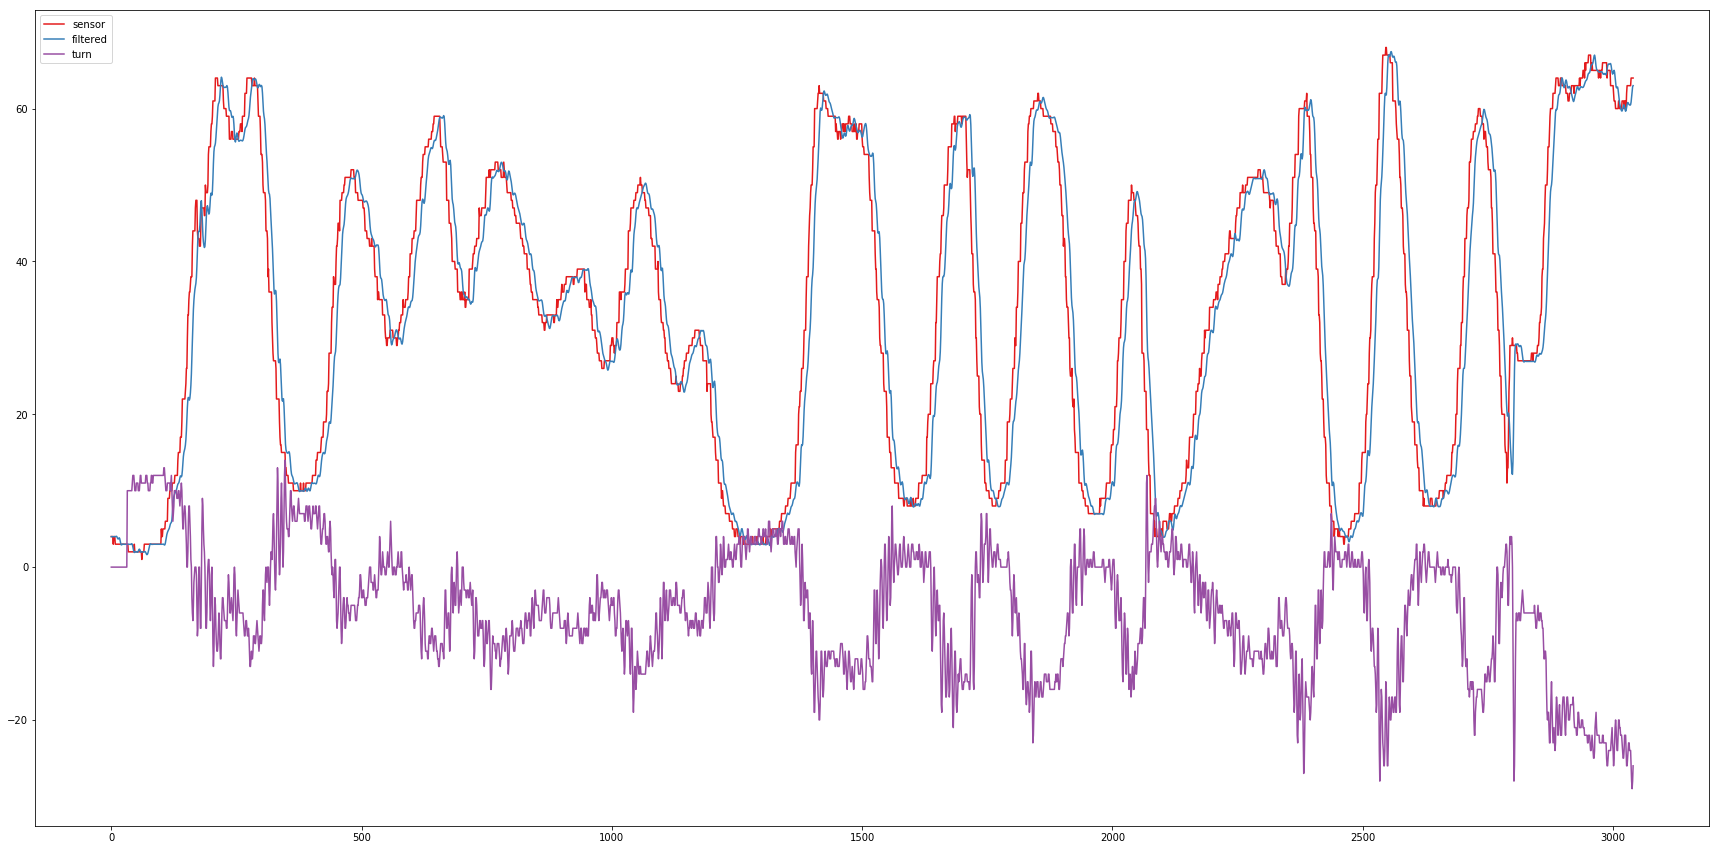

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#0 : sensor
#1 : filtered
#2 : forward
#3 : turn 
#4 : gyro
#5 : left motor angle
#6 : right motor angle
#7 : voltage
#8 : left motor pwm
#9 : right motor pwm

file = open("forward.txt")
file_lines = file.readlines()
filtered_value = []
filter_value = []
foward_value = []
turn_value = []
gyro_value = []
left_motor_value = []
right_motor_value = []
voltage_value = []
left_motor_pwm = []
right_motor_pwm = []

colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf' , '#ff00ff', '#00ff00']

for line in file_lines:
    filter_value.append(float(line.replace("\n", "").split(",")[0]))
    filtered_value.append(float(line.replace("\n", "").split(",")[1]))
    foward_value.append(float(line.replace("\n", "").split(",")[2]))
    turn_value.append(float(line.replace("\n", "").split(",")[3]))
    gyro_value.append(float(line.replace("\n", "").split(",")[4]))
    left_motor_value.append(float(line.replace("\n", "").split(",")[5]))
    right_motor_value.append(float(line.replace("\n", "").split(",")[6]))
    voltage_value.append(float(line.replace("\n", "").split(",")[7]))
    left_motor_pwm.append(float(line.replace("\n", "").split(",")[8]))
    right_motor_pwm.append(float(line.replace("\n", "").split(",")[9]))

print(np.average(filtered_value))
print(np.max(filtered_value))
print(np.min(filtered_value))
plt.figure(figsize=(30, 15))
plt.plot(filter_value,color=colorlist[0], label="sensor")
plt.plot(filtered_value,color=colorlist[1], label="filtered")
plt.plot(turn_value,color=colorlist[3], label="turn")
plt.legend(loc="upper left")
plt.show()

len(turn_value)%N 0
len(turn_value)%N= 0

np.sum(hw)= 0.9995


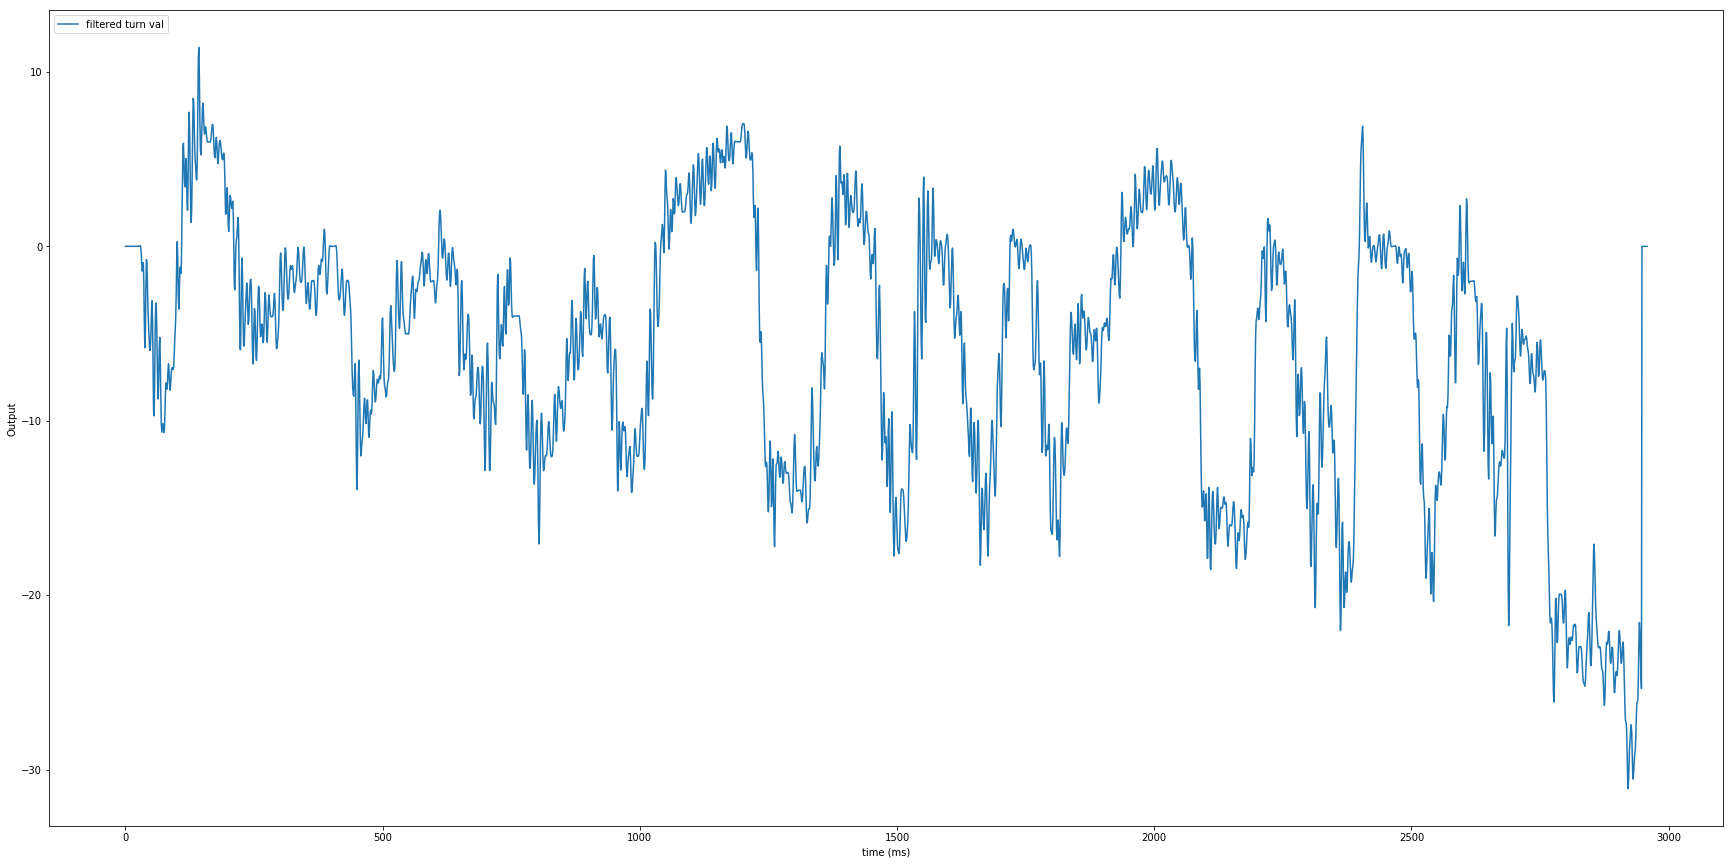

In [13]:
hw = [-0.00299, -0.01312, -0.0105, 0.08365, 0.26271, 0.36000, 0.26271, 0.08365, -0.0105, -0.01312, -0.00299]
N = 11

m = len(turn_value) % N
print('len(turn_value)%N', m)
for i in range(0, m, 1):
    turn_value = np.delete(turn_value, len(turn_value)-1)
    
print('len(turn_value)%N=', len(turn_value)%N)
print()
print('np.sum(hw)=', np.sum(hw))

filtered_turn = [0.0] * len(turn_value)

for i in range(0, N, 1):
    filtered_turn[i] = turn_value[0]

for i in range(N, len(turn_value), 1):
    for j in range(0, N, 1):
        # 生データにフィルタ係数をかける
        filtered_turn[i-N] += turn_value[i-(N-j)] * hw[j]
        
t = range(0, len(turn_value), 1)
plt.figure(figsize=(30, 15))
# plt.plot(t, turn_value, label='color val')
plt.plot(t, filtered_turn, label='filtered turn val')
plt.xlabel("time (ms)")
plt.ylabel("Output")
plt.legend(loc = 'upper left')
plt.show()